# Ford GoBike System Data Usage Patterns
## by Darren Seet


> This data set contains anonymized trip data from the Bay Wheels bicycle sharing service operated by Bay Area Motivate, LLC ("Motivate"). Motivate is an organization that is committed to supporting bicycling as an alternative transportation option. The organization operates multiple bicycle sharing service progams. This dataset contains the data from the Ford GoBike program which is the second largest bike share program in the US with 7,000 bikes, serving San Francisco, San Jose and the East Bay. The dataset contains data for the full year of 2018, 2019 and partial data in 2017, 2020.

## Investigation Overview

> In this investigation, the data population will be obtained from the 2018 and 2019 data Ford GoBike System Data. We will look into the duration, period and user type influences in the use of the bike sharing program. We will compare the trends in the 2 years and also by the user type.

## Dataset Overview

> The data set is obtained from the Bay Wheels Trip data available on [online](https://www.lyft.com/bikes/bay-wheels/system-data).
> The Data
Each trip is anonymized and includes:
>- Trip Duration (seconds)
>- Start Time and Date
>- End Time and Date
>- Start Station ID
>- Start Station Name
>- Start Station Latitude
>- Start Station Longitude
>- End Station ID
>- End Station Name
>- End Station Latitude
>- End Station Longitude
>- Bike ID
>- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


def set_heatmap(ax, data, title, xlabel, ylabel):
    """Function to create a heatmap

    Arguments:
    ax -- Axes to plot
    data -- data source to be plotted
    title -- title of the plot
    xlabel -- label for x axis of plot
    ylabel -- label for y axis of plot
    """
    sb.heatmap(data, cmap='Blues', ax=ax);
    ax.set_title(title, loc='right', fontsize = 16);
    ax.set_xlabel(xlabel, fontsize = 14);
    ax.set_ylabel(ylabel, fontsize = 14);
    
def get_day_of_week_hour_count_for_dataframe(df_target):
    """Function to create a dataset for analysing the count by day of week and hour

    Arguments:
    df_target -- data source to be used for creating dataset
    """
    df_count = df_target.groupby(['day_of_week', 'hour']).size()
    df_count = df_count.reset_index(name='count')
    df_count = df_count.pivot(index='day_of_week', columns='hour', values='count')
    return df_count

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("report_source.csv")

## User Population

> Users are categorized into different User Types with "Subscriber" being a member and "Customer being a casual user. There was a 4% change in the user types usage from 2018 to 2019. The subscriber base usage is about 4 times the customer base usage over the 2 years from 2018 to 2019.

2018 ratios subscriber: 85.05%, customer: 14.95%
2019 ratios subscriber: 80.38%, customer: 19.62%


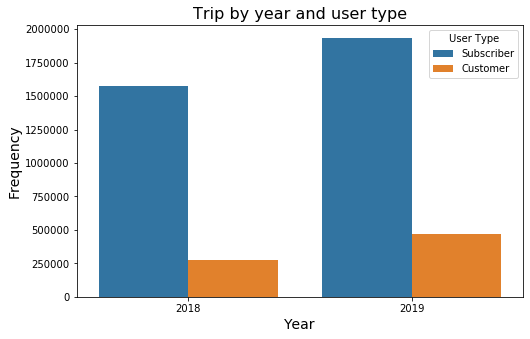

In [3]:
def get_percentage(df):
    total_count = df["bike_id"].count()
    return {
        "Subscriber": df.query("user_type == 'Subscriber'")["bike_id"].count() * 100 / total_count,
        "Customer": df.query("user_type == 'Customer'")["bike_id"].count() * 100 / total_count,
    }

percentage_2018 = get_percentage(df.query("year == 2018"))
percentage_2019 = get_percentage(df.query("year == 2019"))

plt.figure(figsize=(8,5))
ax = sb.countplot("year", hue="user_type", data=df);
ax.set_title('Trip by year and user type', fontsize=16);
ax.set_xlabel('Year', fontsize=14);
ax.set_ylabel('Frequency', fontsize=14);
plt.legend(title="User Type");

print(f"2018 ratios subscriber: {percentage_2018['Subscriber']:.2f}%, customer: {percentage_2018['Customer']:.2f}%")
print(f"2019 ratios subscriber: {percentage_2019['Subscriber']:.2f}%, customer: {percentage_2019['Customer']:.2f}%")

## Usage Duration (mins) Distribution

> The usage distribution is centered around the 5 to 15 minute region indicating that short duration usage account for  a big part of the usage.

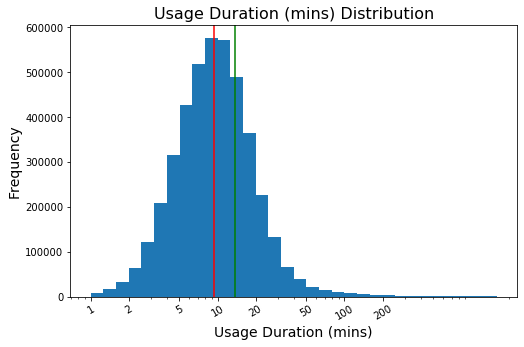

In [4]:
scaled_duration = {
    "bins": 10 ** np.arange(
        0, np.log10(df["duration"].max()) + 0.1, 0.1
    ),
    "bin_ticks": [1, 2, 5, 10, 20, 50, 100, 200], 
    "bin_labels": [1, 2, 5, 10, 20, 50, 100, 200],
    "scale": "log"
}

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = "duration", bins = scaled_duration["bins"]);
plt.xscale(scaled_duration["scale"]);
plt.xticks(scaled_duration["bin_ticks"], scaled_duration["bin_labels"], rotation=30);
plt.xlabel('Usage Duration (mins)', fontsize=14);
plt.ylabel('Frequency', fontsize=14);
plt.title('Usage Duration (mins) Distribution', fontsize=16);
plt.axvline(df.duration.median(), color='r', label='Median');
plt.axvline(df.duration.mean(), color='g', label='Mean');

## Hourly Usage By Day of Week By Year

Usage over both 2018 and 2019 appears to be center around the peak hours in weekdays (7:00 - 9:00 and 16:00 - 19:00). The period concides with the peak hours listed on the [City and County of San Francisco site](https://sfgov.org/scorecards/transportation/congestion) as AM peak 7:00 a.m. - 9:00 a.m., and PM peak as 4:30 p.m. - 6:30 p.m. And indicates that futher studies into the relation to the peak hours in San Francisco and bike sharing behaviors will produce more insights.

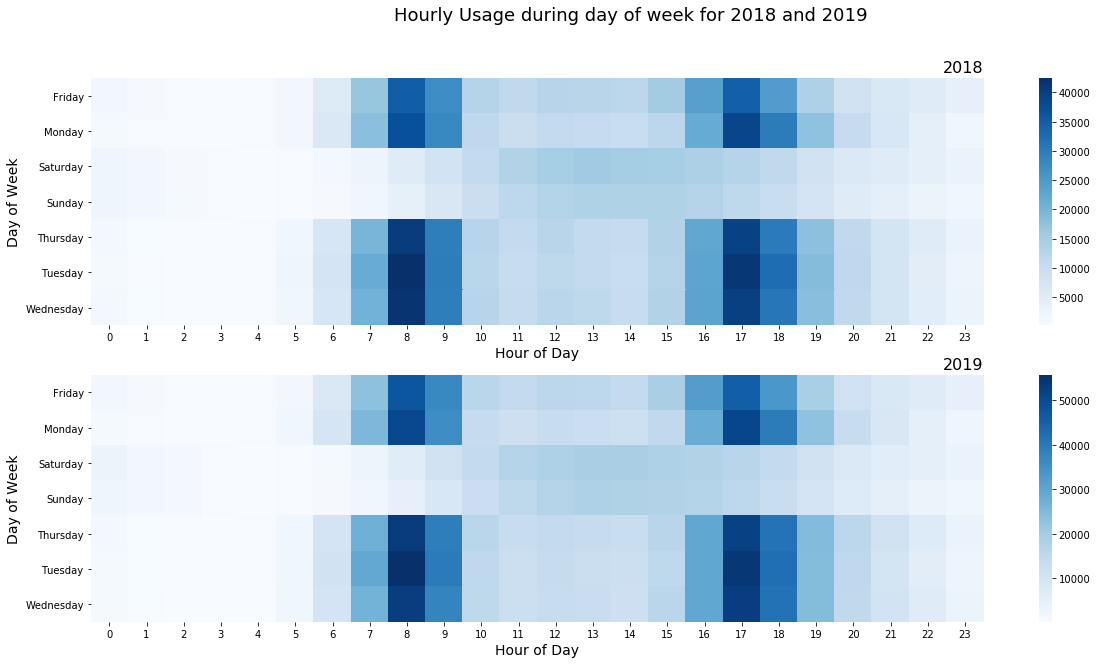

In [5]:
df_2018 = get_day_of_week_hour_count_for_dataframe(df.query("year == 2018"))
df_2019 = get_day_of_week_hour_count_for_dataframe(df.query("year == 2019"))
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(20, 10)
)
plt.suptitle("Hourly Usage during day of week for 2018 and 2019", fontsize = 18)
set_heatmap(ax1, df_2018, "2018", "Hour of Day", "Day of Week")
set_heatmap(ax2, df_2019, "2019", "Hour of Day", "Day of Week")

## Hourly Usage By Day of Week By User Type

Usage by day of week and user type shows similar heavy usage during the peak hours. And it also displays another use by the Customer user types. Customer user types also shows heavy usage during the weekends (Saturday and Sunday) from 9:00 to 18:00. This is on top of the heavy usage in the during the weekday peak hours. Although subscribers contain a higher percentage of the population data compared to the customers.

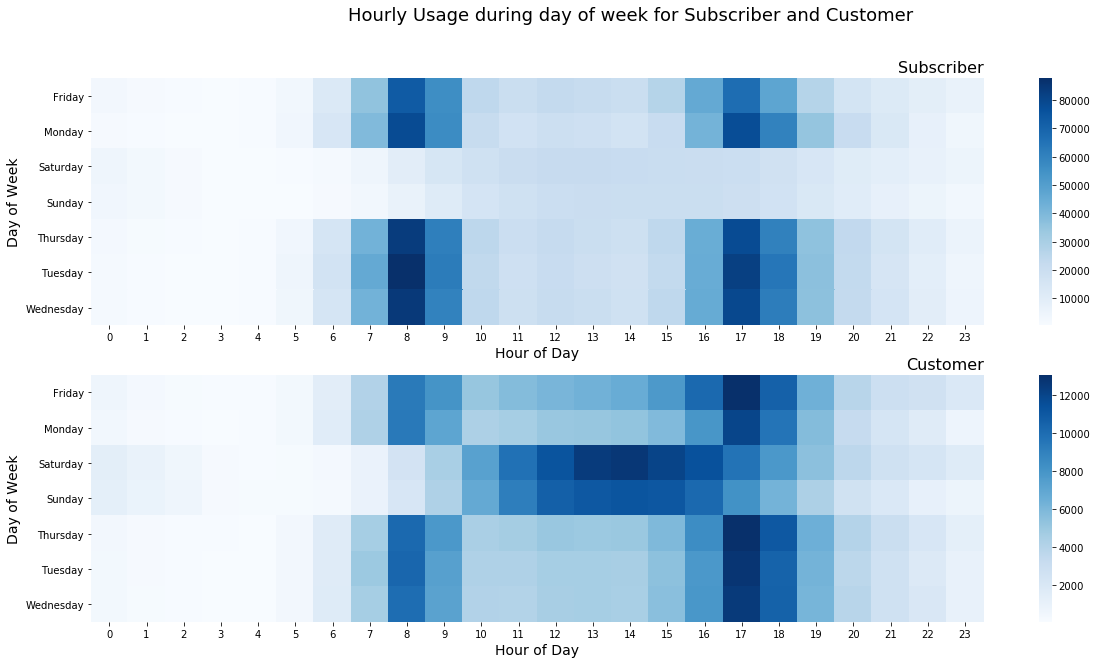

In [6]:
df_subscriber = get_day_of_week_hour_count_for_dataframe(df.query("user_type == 'Subscriber'"))
df_customer = get_day_of_week_hour_count_for_dataframe(df.query("user_type == 'Customer'"))
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(20, 10)
)
plt.suptitle("Hourly Usage during day of week for Subscriber and Customer", fontsize = 18)
set_heatmap(ax1, df_subscriber, "Subscriber", "Hour of Day", "Day of Week")
set_heatmap(ax2, df_customer, "Customer", "Hour of Day", "Day of Week")

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert ford-go-bike-explanation.ipynb --to slides --post serve --template output_toggle